In [ ]:
# prompt: connect to my google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
main = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/churn.csv')
df = main.copy()
df.head()

churn  accountlength internationalplan voicemailplan  numbervmailmessages  \
0    No            128                no           yes                   25   
1    No            107                no           yes                   26   
2    No            137                no            no                    0   
3    No             84               yes            no                    0   
4    No             75               yes            no                    0   

   totaldayminutes  totaldaycalls  totaldaycharge  totaleveminutes  \
0            265.1            110           45.07            197.4   
1            161.6            123           27.47            195.5   
2            243.4            114           41.38            121.2   
3            299.4             71           50.90             61.9   
4            166.7            113           28.34            148.3   

   totalevecalls  totalevecharge  totalnightminutes  totalnightcalls  \
0             99           16.78              244.7               91   
1            103           16.62              254.4              103   
2            110           10.30              162.6              104   
3             88            5.26              196.9               89   
4            122           12.61              186.9              121   

   totalnightcharge  totalintlminutes  totalintlcalls  totalintlcharge  \
0             11.01              10.0               3             2.70   
1             11.45              13.7               3             3.70   
2              7.32              12.2               5             3.29   
3              8.86               6.6               7             1.78   
4              8.41              10.1               3             2.73   

   numbercustomerservicecalls  
0                           1  
1                           1  
2                           0  
3                           2  
4                           3

In [ ]:
rows , col = df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 5000 
Number of Columns : 18


In [ ]:
df.isna().sum()

churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
for column in df.columns:
    print(column, len(df[column].unique()))

churn 2
accountlength 218
internationalplan 2
voicemailplan 2
numbervmailmessages 48
totaldayminutes 1961
totaldaycalls 123
totaldaycharge 1961
totaleveminutes 1879
totalevecalls 126
totalevecharge 1659
totalnightminutes 1853
totalnightcalls 131
totalnightcharge 1028
totalintlminutes 170
totalintlcalls 21
totalintlcharge 170
numbercustomerservicecalls 10


In [ ]:
cats=[]
quants=[]
for column in df.columns:
    if df[column].dtype=='object':
        cats.append(column)
    else:
        quants.append(column)

In [ ]:
print(cats)
print(quants)

['churn', 'internationalplan', 'voicemailplan']
['accountlength', 'numbervmailmessages', 'totaldayminutes', 'totaldaycalls', 'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge', 'totalnightminutes', 'totalnightcalls', 'totalnightcharge', 'totalintlminutes', 'totalintlcalls', 'totalintlcharge', 'numbercustomerservicecalls']


In [ ]:
df.describe()

accountlength  numbervmailmessages  totaldayminutes  totaldaycalls  \
count     5000.00000          5000.000000      5000.000000    5000.000000   
mean       100.25860             7.755200       180.288900     100.029400   
std         39.69456            13.546393        53.894699      19.831197   
min          1.00000             0.000000         0.000000       0.000000   
25%         73.00000             0.000000       143.700000      87.000000   
50%        100.00000             0.000000       180.100000     100.000000   
75%        127.00000            17.000000       216.200000     113.000000   
max        243.00000            52.000000       351.500000     165.000000   

       totaldaycharge  totaleveminutes  totalevecalls  totalevecharge  \
count     5000.000000      5000.000000    5000.000000     5000.000000   
mean        30.649668       200.636560     100.191000       17.054322   
std          9.162069        50.551309      19.826496        4.296843   
min          0.000000         0.000000       0.000000        0.000000   
25%         24.430000       166.375000      87.000000       14.140000   
50%         30.620000       201.000000     100.000000       17.090000   
75%         36.750000       234.100000     114.000000       19.900000   
max         59.760000       363.700000     170.000000       30.910000   

       totalnightminutes  totalnightcalls  totalnightcharge  totalintlminutes  \
count        5000.000000      5000.000000       5000.000000       5000.000000   
mean          200.391620        99.919200          9.017732         10.261780   
std            50.527789        19.958686          2.273763          2.761396   
min             0.000000         0.000000          0.000000          0.000000   
25%           166.900000        87.000000          7.510000          8.500000   
50%           200.400000       100.000000          9.020000         10.300000   
75%           234.700000       113.000000         10.560000         12.000000   
max           395.000000       175.000000         17.770000         20.000000   

       totalintlcalls  totalintlcharge  numbercustomerservicecalls  
count     5000.000000      5000.000000                 5000.000000  
mean         4.435200         2.771196                    1.570400  
std          2.456788         0.745514                    1.306363  
min          0.000000         0.000000                    0.000000  
25%          3.000000         2.300000                    1.000000  
50%          4.000000         2.780000                    1.000000  
75%          6.000000         3.240000                    2.000000  
max         20.000000         5.400000                    9.000000

In [ ]:
 df.describe(include='object')

churn internationalplan voicemailplan
count   5000              5000          5000
unique     2                 2             2
top       No                no            no
freq    4293              4527          3677

In [ ]:
for quant in quants:
    print(quant, len(df[quant].unique()), df[quant].unique())
    print("......................................................")

accountlength 218 [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221 187  14 238 216
 222 233]
......................................................
numbervmailmessages 48 [25 26  0 24 37 27

In [ ]:
for quant in quants:
    print(quant,sum(df[quant]<0))

accountlength 0
numbervmailmessages 0
totaldayminutes 0
totaldaycalls 0
totaldaycharge 0
totaleveminutes 0
totalevecalls 0
totalevecharge 0
totalnightminutes 0
totalnightcalls 0
totalnightcharge 0
totalintlminutes 0
totalintlcalls 0
totalintlcharge 0
numbercustomerservicecalls 0


In [ ]:
df['churn']=np.where(df['churn']=="No",0,1)

In [ ]:
df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: churn, Length: 5000, dtype: int64

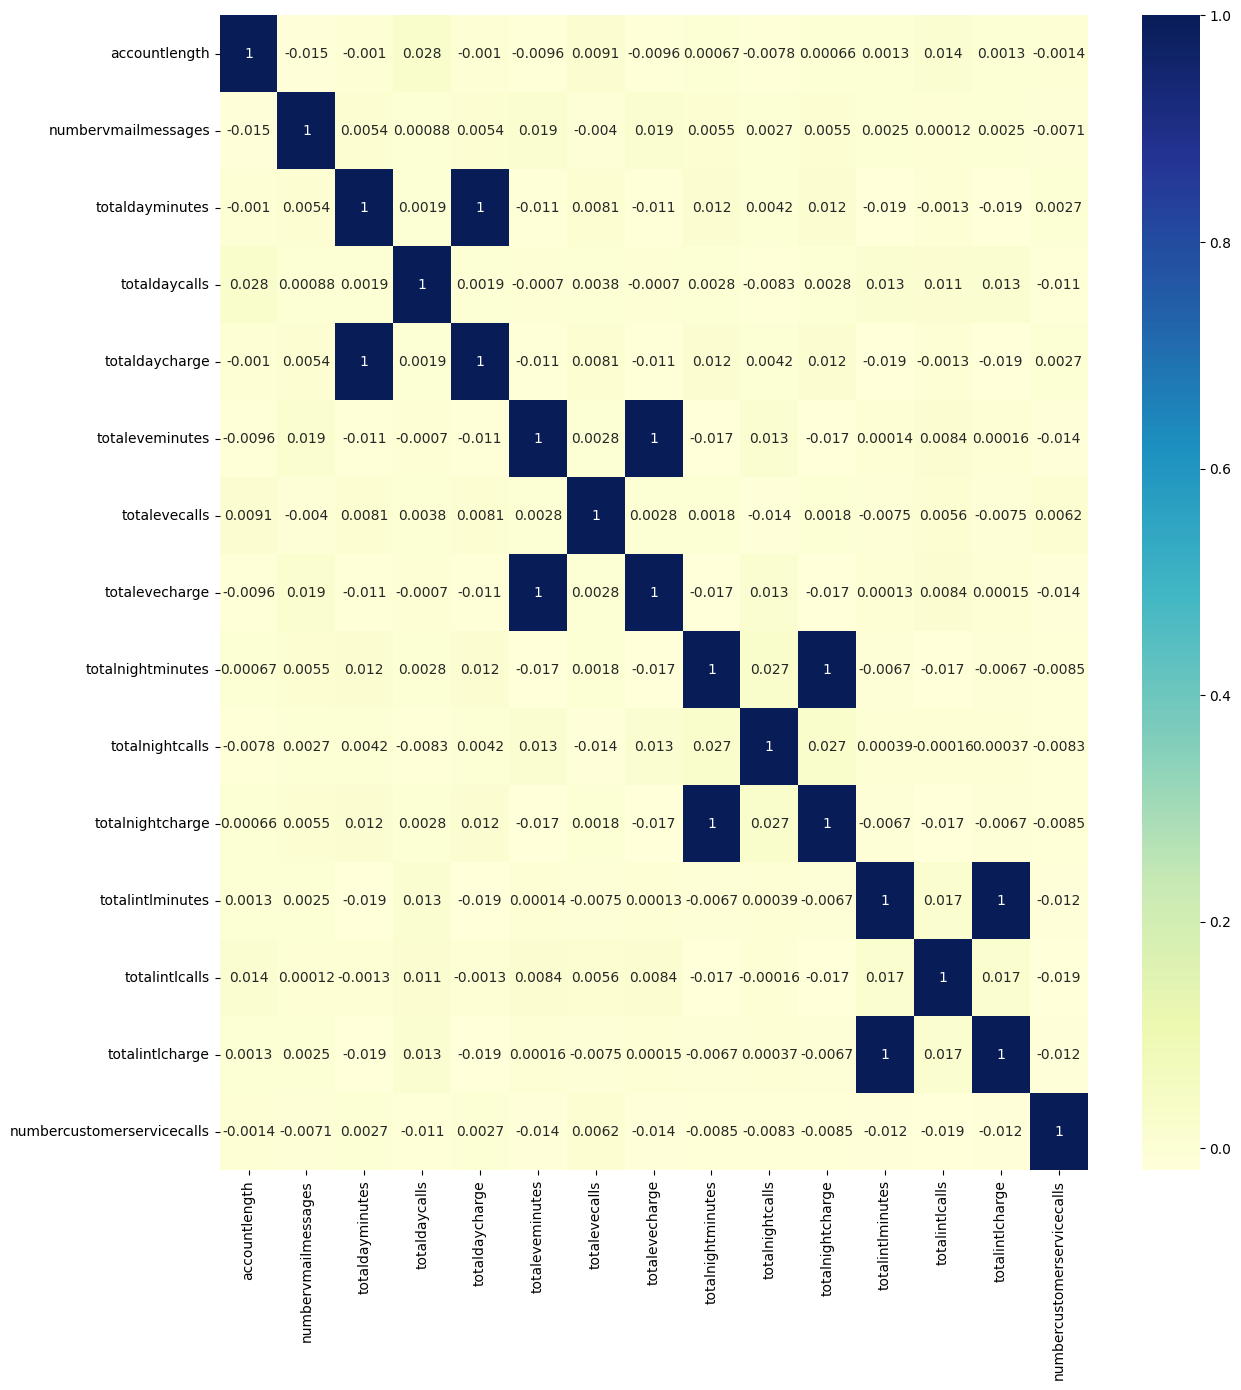

In [ ]:
plt.figure(figsize=(14,15))
sns.heatmap(df.loc[:,quants].corr(),cmap='YlGnBu',annot=True)
plt.show()

In [ ]:
df_new= df.copy()

## Feature Engineering

As we got that there is perfect multicollinearity between the total charge and total minutes in day, evening and night time and the international calls, we decided to remove one of them in each pair.So, we removed the total charge variables in each pair from our dataset.


In [ ]:
df_new = df_new.drop(['totaldaycharge','totalevecharge','totalnightcharge','totalintlcharge'],axis=1)

In [ ]:
df_new.head()

churn  accountlength internationalplan voicemailplan  numbervmailmessages  \
0      0            128                no           yes                   25   
1      0            107                no           yes                   26   
2      0            137                no            no                    0   
3      0             84               yes            no                    0   
4      0             75               yes            no                    0   

   totaldayminutes  totaldaycalls  totaleveminutes  totalevecalls  \
0            265.1            110            197.4             99   
1            161.6            123            195.5            103   
2            243.4            114            121.2            110   
3            299.4             71             61.9             88   
4            166.7            113            148.3            122   

   totalnightminutes  totalnightcalls  totalintlminutes  totalintlcalls  \
0              244.7               91              10.0               3   
1              254.4              103              13.7               3   
2              162.6              104              12.2               5   
3              196.9               89               6.6               7   
4              186.9              121              10.1               3   

   numbercustomerservicecalls  
0                           1  
1                           1  
2                           0  
3                           2  
4                           3

In [ ]:
# label encoded dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['internationalplan'] = le.fit_transform(df_new['internationalplan'])
df_new['voicemailplan'] = le.fit_transform(df_new['voicemailplan'])
df_new.head()

churn  accountlength  internationalplan  voicemailplan  \
0      0            128                  0              1   
1      0            107                  0              1   
2      0            137                  0              0   
3      0             84                  1              0   
4      0             75                  1              0   

   numbervmailmessages  totaldayminutes  totaldaycalls  totaleveminutes  \
0                   25            265.1            110            197.4   
1                   26            161.6            123            195.5   
2                    0            243.4            114            121.2   
3                    0            299.4             71             61.9   
4                    0            166.7            113            148.3   

   totalevecalls  totalnightminutes  totalnightcalls  totalintlminutes  \
0             99              244.7               91              10.0   
1            103              254.4              103              13.7   
2            110              162.6              104              12.2   
3             88              196.9               89               6.6   
4            122              186.9              121              10.1   

   totalintlcalls  numbercustomerservicecalls  
0               3                           1  
1               3                           1  
2               5                           0  
3               7                           2  
4               3                           3

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   int64  
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   int64  
 3   voicemailplan               5000 non-null   int64  
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaleveminutes             5000 non-null   float64
 8   totalevecalls               5000 non-null   int64  
 9   totalnightminutes           5000 non-null   float64
 10  totalnightcalls             5000 non-null   int64  
 11  totalintlminutes            5000 non-null   float64
 12  totalintlcalls              5000 non-null   int64  
 13  numbercustomerservicecalls  5000 

In [ ]:
r , c = df_new.shape
print(f"Number of Rows : {r} \nNumber of Columns : {c}")

Number of Rows : 5000 
Number of Columns : 14


In [ ]:
cats=['churn','internationalplan', 'voicemailplan']
all = df_new.columns.tolist()
quants = [i for i in all if i not in cats]
# change the data type into float
df_new[quants] = df_new[quants].astype(float)
df_new[cats]=df_new[cats].astype(object)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   object 
 1   accountlength               5000 non-null   float64
 2   internationalplan           5000 non-null   object 
 3   voicemailplan               5000 non-null   object 
 4   numbervmailmessages         5000 non-null   float64
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   float64
 7   totaleveminutes             5000 non-null   float64
 8   totalevecalls               5000 non-null   float64
 9   totalnightminutes           5000 non-null   float64
 10  totalnightcalls             5000 non-null   float64
 11  totalintlminutes            5000 non-null   float64
 12  totalintlcalls              5000 non-null   float64
 13  numbercustomerservicecalls  5000 

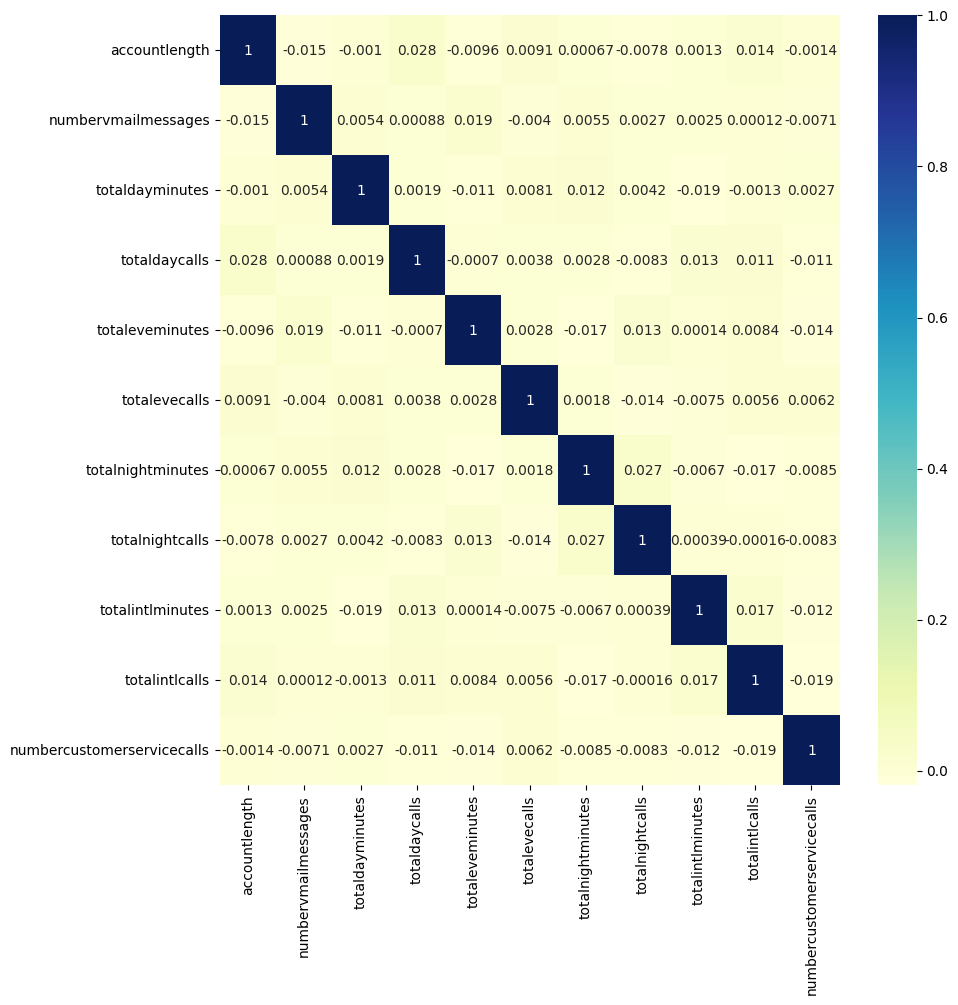

In [ ]:
# correlation heatmap to identify if there any correlated numerical features having
# correlation heatmap with new features
plt.figure(figsize=(10,10))
sns.heatmap(df_new.loc[:,quants].corr(),cmap='YlGnBu',annot=True)
plt.show()

# **FAMD**

In [ ]:
pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.8/415.8 kB 5.2 MB/s eta 0:00:00


In [ ]:
import pprint
import prince

famd = prince.FAMD(
     n_components=14,
     copy=True,
     check_input=True,
     engine='scipy',
     handle_unknown="error",
     random_state=100)

## Fit FAMD object to data
famd = famd.fit(df_new.drop("churn",axis=1)) ## Exclude target variable "Churn"

transformed_data = famd.transform(df_new.drop("churn",axis=1))
eigenvalues = famd.eigenvalues_
eigenvalues

array([1.95650184e+00, 1.07748935e+00, 1.03981501e+00, 1.03325050e+00,
       1.02575863e+00, 1.00578682e+00, 9.90747102e-01, 9.87893646e-01,
       9.83223600e-01, 9.71484927e-01, 9.52681329e-01, 9.30017251e-01,
       4.53499941e-02, 7.95762222e-32])

In [ ]:
#arguments in famd function
dir(famd)
famd._eigenvalues_summary

eigenvalue  % of variance  % of variance (cumulative)
component                                                         
0          1.956502e+00   1.505001e+01                   15.050014
1          1.077489e+00   8.288380e+00                   23.338394
2          1.039815e+00   7.998577e+00                   31.336971
3          1.033250e+00   7.948081e+00                   39.285052
4          1.025759e+00   7.890451e+00                   47.175503
5          1.005787e+00   7.736822e+00                   54.912324
6          9.907471e-01   7.621132e+00                   62.533456
7          9.878936e-01   7.599182e+00                   70.132638
8          9.832236e-01   7.563258e+00                   77.695896
9          9.714849e-01   7.472961e+00                   85.168857
10         9.526813e-01   7.328318e+00                   92.497175
11         9.300173e-01   7.153979e+00                   99.651154
12         4.534999e-02   3.488461e-01                  100.000000
13         7.957622e-32   6.121248e-31                  100.000000

In [ ]:
transformed_data.head()

component        0         1         2         3         4         5   \
0          2.079190 -0.293295 -0.900987  1.394096  0.391529 -0.166070   
1          2.140487  0.264521 -0.113929  1.015030 -1.209939 -0.515120   
2         -0.877748  0.880137 -1.126761  1.109685 -0.216082 -0.426715   
3         -0.865328  0.020509 -0.864809  0.782172  2.879107 -1.761261   
4         -0.818266  0.798559 -0.192527  0.385903  1.790772 -1.222515   

component        6         7         8         9         10        11  \
0          0.120997  0.316441  0.765703 -0.072672 -0.708022  0.782256   
1         -0.664620 -0.920337  0.645469  0.385535 -0.150029  0.346578   
2          1.149948 -0.067523  0.168341 -0.321553  1.211338  1.273755   
3          2.839975  0.652655 -0.721196 -0.900998  0.395479 -2.268860   
4         -0.969034 -1.201812 -0.537014  0.340466  1.687767 -2.082306   

component        12            13  
0          0.275098 -7.392086e-17  
1          0.218860 -2.959655e-16  
2         -0.023843  2.487093e-16  
3          0.011718  4.707539e-16  
4         -0.005499 -8.435763e-17

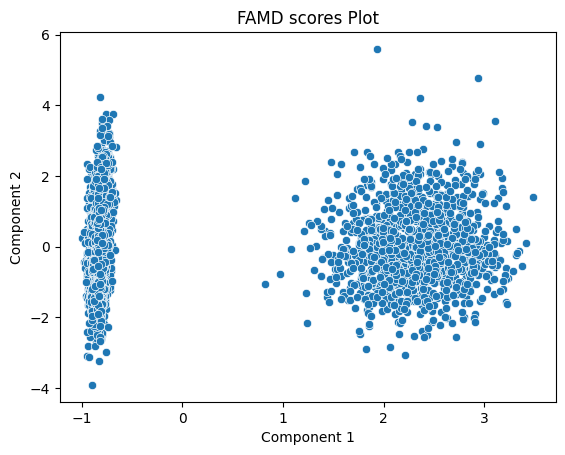

In [ ]:
import matplotlib.pyplot as plt

transformed_data['churn'] = df_new['churn'].values  # Assuming 'Churn' is in df_train

sns.scatterplot(
    x=transformed_data.iloc[:, 0],   # First component
    y=transformed_data.iloc[:, 1],   # Second component
    #hue=df_new['churn'],   # Color by 'Churn'
    palette='Set1',                  # Change color palette if needed
    alpha=1                        # Set transparency for better visibility
)

plt.title('FAMD scores Plot')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

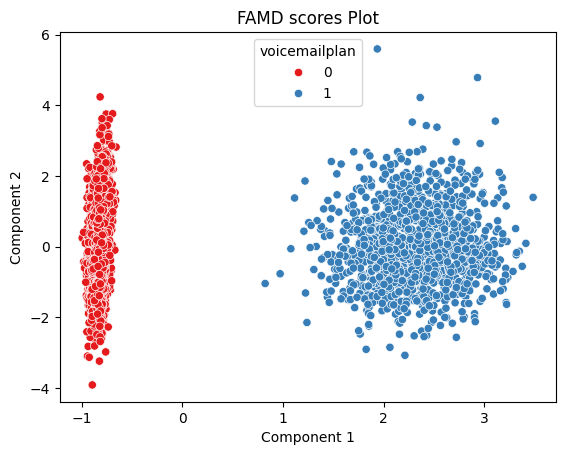

In [ ]:
import matplotlib.pyplot as plt

transformed_data['churn'] = df_new['churn'].values  # Assuming 'Churn' is in df_train

sns.scatterplot(
    x=transformed_data.iloc[:, 0],   # First component
    y=transformed_data.iloc[:, 1],   # Second component
    hue=df_new['voicemailplan'],   # Color by 'Churn'
    palette='Set1',                  # Change color palette if needed
    alpha=1                        # Set transparency for better visibility
)

plt.title('FAMD scores Plot')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [ ]:
col=famd.column_coordinates_
col

component                         0         1         2         3         4   \
variable                                                                       
accountlength               0.000499  0.079561  0.209656  0.065074  0.024387   
numbervmailmessages         0.976020  0.000092  0.000774  0.000065  0.000064   
totaldayminutes             0.000060  0.000647  0.027883  0.172097  0.411295   
totaldaycalls               0.000001  0.104120  0.109504  0.087797  0.067333   
totaleveminutes             0.002036  0.067421  0.161819  0.025589  0.039539   
totalevecalls               0.000112  0.001778  0.147059  0.000002  0.051569   
totalnightminutes           0.000115  0.116835  0.002647  0.381899  0.044291   
totalnightcalls             0.000193  0.005933  0.260288  0.198294  0.001249   
totalintlminutes            0.000057  0.188482  0.030609  0.000888  0.057505   
totalintlcalls              0.000051  0.162647  0.000319  0.000003  0.036612   
numbercustomerservicecalls  0.000547  0.089039  0.080516  0.091123  0.041469   
internationalplan           0.000523  0.260848  0.008251  0.010404  0.250301   
voicemailplan               0.976287  0.000087  0.000490  0.000016  0.000146   

component                         5         6             7         8   \
variable                                                                 
accountlength               0.000069  0.091711  6.633659e-02  0.107552   
numbervmailmessages         0.000027  0.000098  2.331035e-07  0.000143   
totaldayminutes             0.007044  0.115030  1.916535e-02  0.003211   
totaldaycalls               0.000840  0.093581  2.927129e-02  0.087868   
totaleveminutes             0.218862  0.209574  1.385914e-02  0.011298   
totalevecalls               0.274461  0.008982  4.555173e-01  0.000235   
totalnightminutes           0.001695  0.003211  8.088026e-02  0.003786   
totalnightcalls             0.003149  0.047771  3.686780e-05  0.239560   
totalintlminutes            0.212164  0.001578  3.052669e-01  0.004291   
totalintlcalls              0.134086  0.301679  9.320946e-03  0.221466   
numbercustomerservicecalls  0.070293  0.105452  2.592837e-03  0.303434   
internationalplan           0.083076  0.012075  5.643854e-03  0.000266   
voicemailplan               0.000019  0.000005  2.083569e-06  0.000114   

component                         9         10        11            12  \
variable                                                                 
accountlength               0.282959  0.022587  0.049606  1.699310e-06   
numbervmailmessages         0.000005  0.000037  0.000007  2.266880e-02   
totaldayminutes             0.041157  0.029614  0.172796  2.442560e-07   
totaldaycalls               0.368271  0.047370  0.004044  1.922453e-07   
totaleveminutes             0.016850  0.205258  0.027893  3.642384e-07   
totalevecalls               0.001238  0.057214  0.001832  8.107993e-08   
totalnightminutes           0.000046  0.256083  0.108510  3.445113e-09   
totalnightcalls             0.006532  0.221377  0.015617  1.032018e-06   
totalintlminutes            0.008910  0.037526  0.152723  7.591074e-08   
totalintlcalls              0.059169  0.026272  0.048373  1.568077e-06   
numbercustomerservicecalls  0.154763  0.047174  0.013596  1.376468e-06   
internationalplan           0.031520  0.002099  0.334994  2.473579e-07   
voicemailplan               0.000064  0.000070  0.000025  2.267431e-02   

component                             13  
variable                                  
accountlength               1.314523e-65  
numbervmailmessages         4.704646e-63  
totaldayminutes             8.201974e-65  
totaldaycalls               1.003651e-64  
totaleveminutes             1.335615e-63  
totalevecalls               2.198044e-64  
totalnightminutes           1.696783e-65  
totalnightcalls             6.410512e-65  
totalintlminutes            2.610272e-64  
totalintlcalls              2.977640e-65  
numbercustomerservicecalls  3.250925e-65  
internationalplan 

In [ ]:
col.iloc[:, 1]

variable
accountlength                 0.079561
numbervmailmessages           0.000092
totaldayminutes               0.000647
totaldaycalls                 0.104120
totaleveminutes               0.067421
totalevecalls                 0.001778
totalnightminutes             0.116835
totalnightcalls               0.005933
totalintlminutes              0.188482
totalintlcalls                0.162647
numbercustomerservicecalls    0.089039
internationalplan             0.260848
voicemailplan                 0.000087
Name: 1, dtype: float64

In [ ]:
import pandas as pd
import plotly.express as px
from prince import FAMD

famd1.fit(df_new)

# Transform the data
transformed_data = famd1.transform(df_new)

# Get the coordinates of the variables
variable_coordinates = famd.column_coordinates_

# Create a scatter plot for variables
fig = px.scatter(
    x=variable_coordinates.iloc[:, 0],
    y=variable_coordinates.iloc[:, 1],
    text=variable_coordinates.index,
    title='Variable Representation in FAMD Space',
    labels={'x': 'Dimension 1', 'y': 'Dimension 2'}
)

# Add arrows to represent variables, without background color on labels
for i in range(variable_coordinates.shape[0]):
    fig.add_annotation(
        x=variable_coordinates.iloc[i, 0] * 1.15,  # Slightly extend arrow endpoint for visibility
        y=variable_coordinates.iloc[i, 1] * 1.15,
        ax=0,  # Start at origin
        ay=0,
        xref='x',
        yref='y',
        axref='x',
        ayref='y',
        showarrow=True,
        arrowhead=2,
        arrowsize=1.5,  # Increase arrowhead size
        arrowcolor='black',
        #font=dict(color='black', size=10),
        #text=variable_coordinates.index[i],
        #bordercolor='black',
        borderwidth=1
    )

# Update layout with grid lines and centered axes
fig.update_layout(
    width=800,
    height=600,
    xaxis=dict(showgrid=True, zeroline=True, zerolinewidth=2, zerolinecolor='black'),
    yaxis=dict(showgrid=True, zeroline=True, zerolinewidth=2, zerolinecolor='black')
)

fig.show()


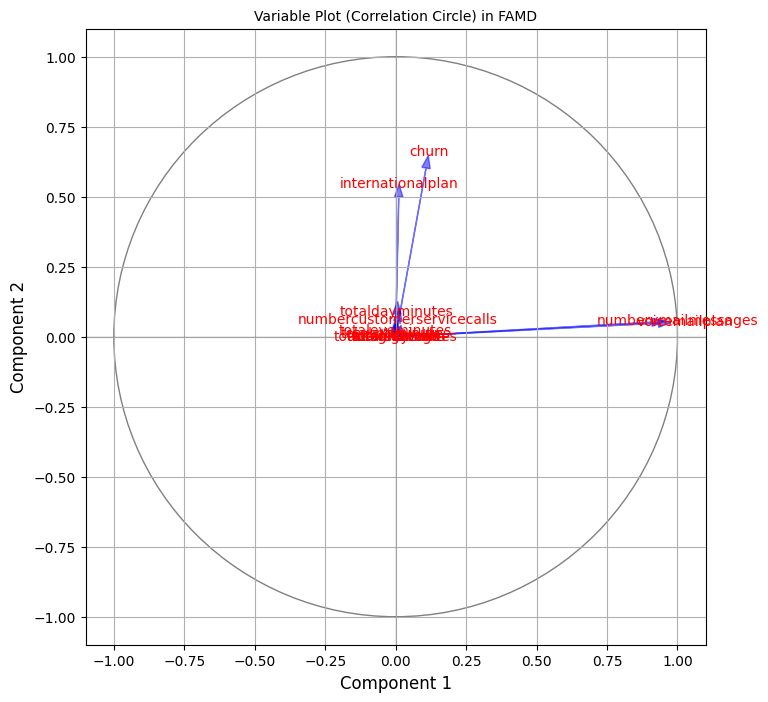

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Extract the first two components of column contribution
component_1 = col.iloc[:, 0]
component_2 = col.iloc[:, 1]

# Create a variable plot
plt.figure(figsize=(8, 8))

# Draw a unit circle
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
plt.gca().add_artist(circle)

# Plot arrows for each variable with larger font size and rotation
for i, var in enumerate(col.index):
    plt.arrow(0, 0, component_1[i], component_2[i], color='b', alpha=0.5, head_width=0.03)
    plt.text(component_1[i]*1.1, component_2[i]*1.1, var, color='red', fontsize=10, ha='center', va='center')

# Add labels and titles with larger fonts
plt.xlabel('Component 1', fontsize=12)
plt.ylabel('Component 2', fontsize=12)
plt.title('Variable Plot (Correlation Circle) in FAMD', fontsize=10)

# Set limits and grid
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='black', linewidth=0.1)
plt.axvline(0, color='black', linewidth=0.1)
plt.grid(True)

# Display the plot

plt.show()


# **Cluster analysis & Outlier analysis**

Applying the Gower's Distance and then DBSCAN clustering for the original dataset

Gower's distance use when there are both categorical and numerical variables in the dataset

In [ ]:
pip install gower

In [ ]:
import gower
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

df_scaled = StandardScaler().fit_transform(df_new)
distance_matrix = gower.gower_matrix(df_scaled)
distance_matrix

array([[0.        , 0.05615212, 0.17724295, ..., 0.20167014, 0.18198061,
        0.14838308],
       [0.05615212, 0.        , 0.19149467, ..., 0.16864106, 0.19516042,
        0.13661835],
       [0.17724295, 0.19149467, 0.        , ..., 0.10021216, 0.09127059,
        0.24540675],
       ...,
       [0.20167014, 0.16864106, 0.10021216, ..., 0.        , 0.08755724,
        0.23980972],
       [0.18198061, 0.19516042, 0.09127059, ..., 0.08755724, 0.        ,
        0.2315679 ],
       [0.14838308, 0.13661835, 0.24540675, ..., 0.23980972, 0.2315679 ,
        0.        ]], dtype=float32)

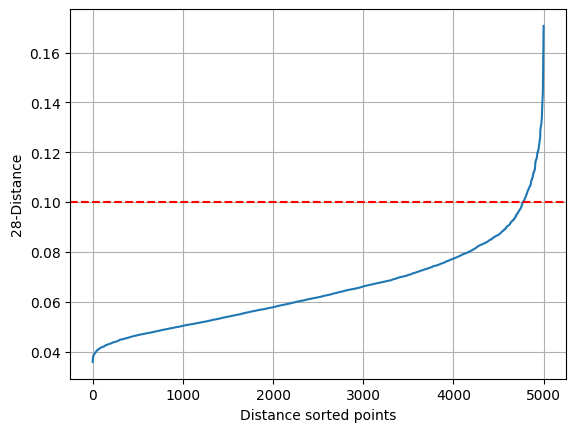

In [ ]:
# initialize the value of k for kNN which can be same as MinPts
k = 28

# Compute k-nearest neighbors
# you need to add 1 to k as this function also return
# distance to itself (first column is zero)
nbrs = NearestNeighbors(n_neighbors=k+1,metric='precomputed').fit(distance_matrix)

# get distances
dist, ind = nbrs.kneighbors(distance_matrix)
k_dist = np.sort(dist[:, -1])

plt.plot(k_dist)
plt.axhline(y=0.1, color='r', linestyle='--', label='y=0.1')
plt.xlabel('Distance sorted points')
plt.ylabel(f'{k}-Distance')
plt.grid()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps = 0.1, min_samples = 27, metric = "precomputed").fit(distance_matrix)
dbs.labels_
np.unique(dbs.labels_)

array([-1,  0,  1])

In [ ]:
import plotly.express as px
fig = px.scatter(x=transformed_data.iloc[:, 0], y=transformed_data.iloc[:, 1], color=dbs.labels_)
fig.show()

# Assuming you have a DataFrame named

In [ ]:
clusters = dbs.fit_predict(distance_matrix)
df_cluster = df_new.copy()
# Convert to DataFrame for easier manipulation
df_cluster['cluster'] = clusters

# Identify outliers
outliers = df_cluster[df_cluster['cluster'] == -1]
outliers

# Number of outliers
n = outliers.shape[0]
print(f"Number of Outliers: {n}")

Number of Outliers: 55


In [ ]:
outliers

churn  accountlength internationalplan voicemailplan  \
41       1          135.0                 1             1   
57       1          121.0                 0             1   
115      1           36.0                 1             1   
198      1          131.0                 1             1   
250      1           33.0                 0             1   
319      1          128.0                 1             1   
473      1           72.0                 0             1   
514      1           60.0                 1             1   
542      1          152.0                 1             1   
547      1           95.0                 1             1   
569      1          133.0                 1             1   
613      1          105.0                 1             1   
626      1           95.0                 1             1   
771      1          149.0                 1             1   
792      1           69.0                 1             1   
966      1           48.0                 0             1   
987      1          110.0                 1             1   
1136     1          106.0                 1             1   
1193     1          119.0                 1             1   
1263     1           40.0                 0             1   
1325     1           17.0                 0             1   
1407     1           73.0                 0             1   
1435     1           89.0                 1             1   
1467     1           67.0                 1             1   
1537     1          118.0                 1             1   
1861     1          119.0                 1             1   
1887     1          105.0                 1             1   
1903     1           93.0                 1             1   
1935     1          108.0                 1             1   
2106     1          128.0                 1             1   
2347     1           68.0                 1             1   
2387     1          108.0                 0             1   
2407     1          139.0                 1             1   
2468     1          152.0                 1             1   
2479     1          116.0                 1             1   
2539     1          138.0                 1             1   
2619     1          147.0                 1             1   
2664     1          188.0                 1             1   
2687     1          125.0                 1             1   
2735     1           90.0                 1             1   
2774     1           62.0                 1             1   
2901     1           85.0                 0             1   
3209     1           68.0                 1             1   
3246     1           77.0                 1             1   
3291     1          119.0                 1             1   
3452     1          109.0                 1             1   
3630     1           49.0                 1             1   
3909     1          155.0                 1             1   
4018     1          175.0                 1             1   
4062     1           77.0                 1             1   
4171     1           36.0                 1             1   
4502     1           60.0                 1             1   
4636     1          136.0                 1             1   
4676     1          200.0                 1             1   
4948     1          114.0                 1             1   

      numbervmailmessages  totaldayminutes  totaldaycalls  totaleveminutes  \
41                   41.0            173.1           85.0            203.9   
57                   30.0            198.4          129.0             75.3   
115                  42.0            196.8           89.0            254.9   
198                  26.0            292.9          101.0            199.7   
250                  29.0            157.4           99.0            117.9   
319                  32.0            223.5           81.0            188.8   
473                  33.0             96.6

In [ ]:
p = (n/df_new.shape[0])*100
print(f"Proportion of outliers of the dataset: {p}%")

Proportion of outliers of the dataset: 1.0999999999999999%


In [ ]:
from sklearn import metrics
clust = set(dbs.labels_)-{-1}

if len(clust) > 1 and -1 not in clust:
  silhouette_coefficient = metrics.silhouette_score(distance_matrix[dbs.labels_ != -1][:, dbs.labels_ != -1], dbs.labels_[dbs.labels_ != -1], metric='precomputed')

print("Silhouette Coefficient: %0.3f" % silhouette_coefficient)

Silhouette Coefficient: 0.439


# Cluster Data Splitting

In [ ]:
df_voicemail_true = df_new.loc[df_new['voicemailplan']==1,:]
df_voicemail_false = df_new.loc[df_new['voicemailplan']==0,:]

In [ ]:
df_voicemail_true.drop(columns='voicemailplan',inplace=True)
df_voicemail_false.drop(columns='voicemailplan',inplace=True)

In [ ]:
df_voicemail_true.head()

churn  accountlength internationalplan  numbervmailmessages  \
0      0          128.0                 0                 25.0   
1      0          107.0                 0                 26.0   
6      0          121.0                 0                 24.0   
9      0          141.0                 1                 37.0   
16     0           85.0                 0                 27.0   

    totaldayminutes  totaldaycalls  totaleveminutes  totalevecalls  \
0             265.1          110.0            197.4           99.0   
1             161.6          123.0            195.5          103.0   
6             218.2           88.0            348.5          108.0   
9             258.6           84.0            222.0          111.0   
16            196.4          139.0            280.9           90.0   

    totalnightminutes  totalnightcalls  totalintlminutes  totalintlcalls  \
0               244.7             91.0              10.0             3.0   
1               254.4            103.0              13.7             3.0   
6               212.6            118.0               7.5             7.0   
9               326.4             97.0              11.2             5.0   
16               89.3             75.0              13.8             4.0   

    numbercustomerservicecalls  
0                          1.0  
1                          1.0  
6                          3.0  
9                          0.0  
16                         1.0

In [ ]:
df_voicemail_true.to_csv('df_voicemail_true.csv', index=False)
df_voicemail_false.to_csv('df_voicemail_false.csv', index=False)

# EDA for the original dataset

## Train test split

In [ ]:
df_new = df_new.drop("voicemailplan",axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test= train_test_split(df_new,stratify=df['churn'],test_size=0.2,random_state=100)

Response variable - churn

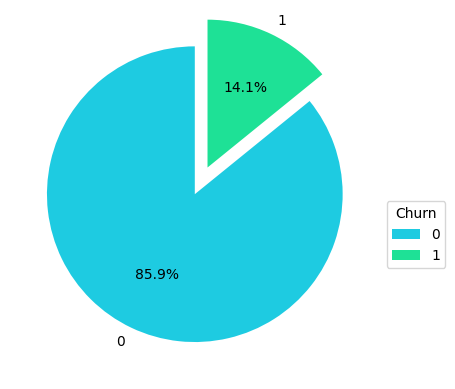

In [ ]:
frequency = df_train['churn'].value_counts()

fig, ax = plt.subplots()
ax.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=90, explode=(0,0.2), colors=["#1ECBE1","#1EE196"])
ax.legend(frequency.index, title="Churn", loc="best", bbox_to_anchor=(1, 0.5))
plt.show()

<Figure size 800x800 with 0 Axes>

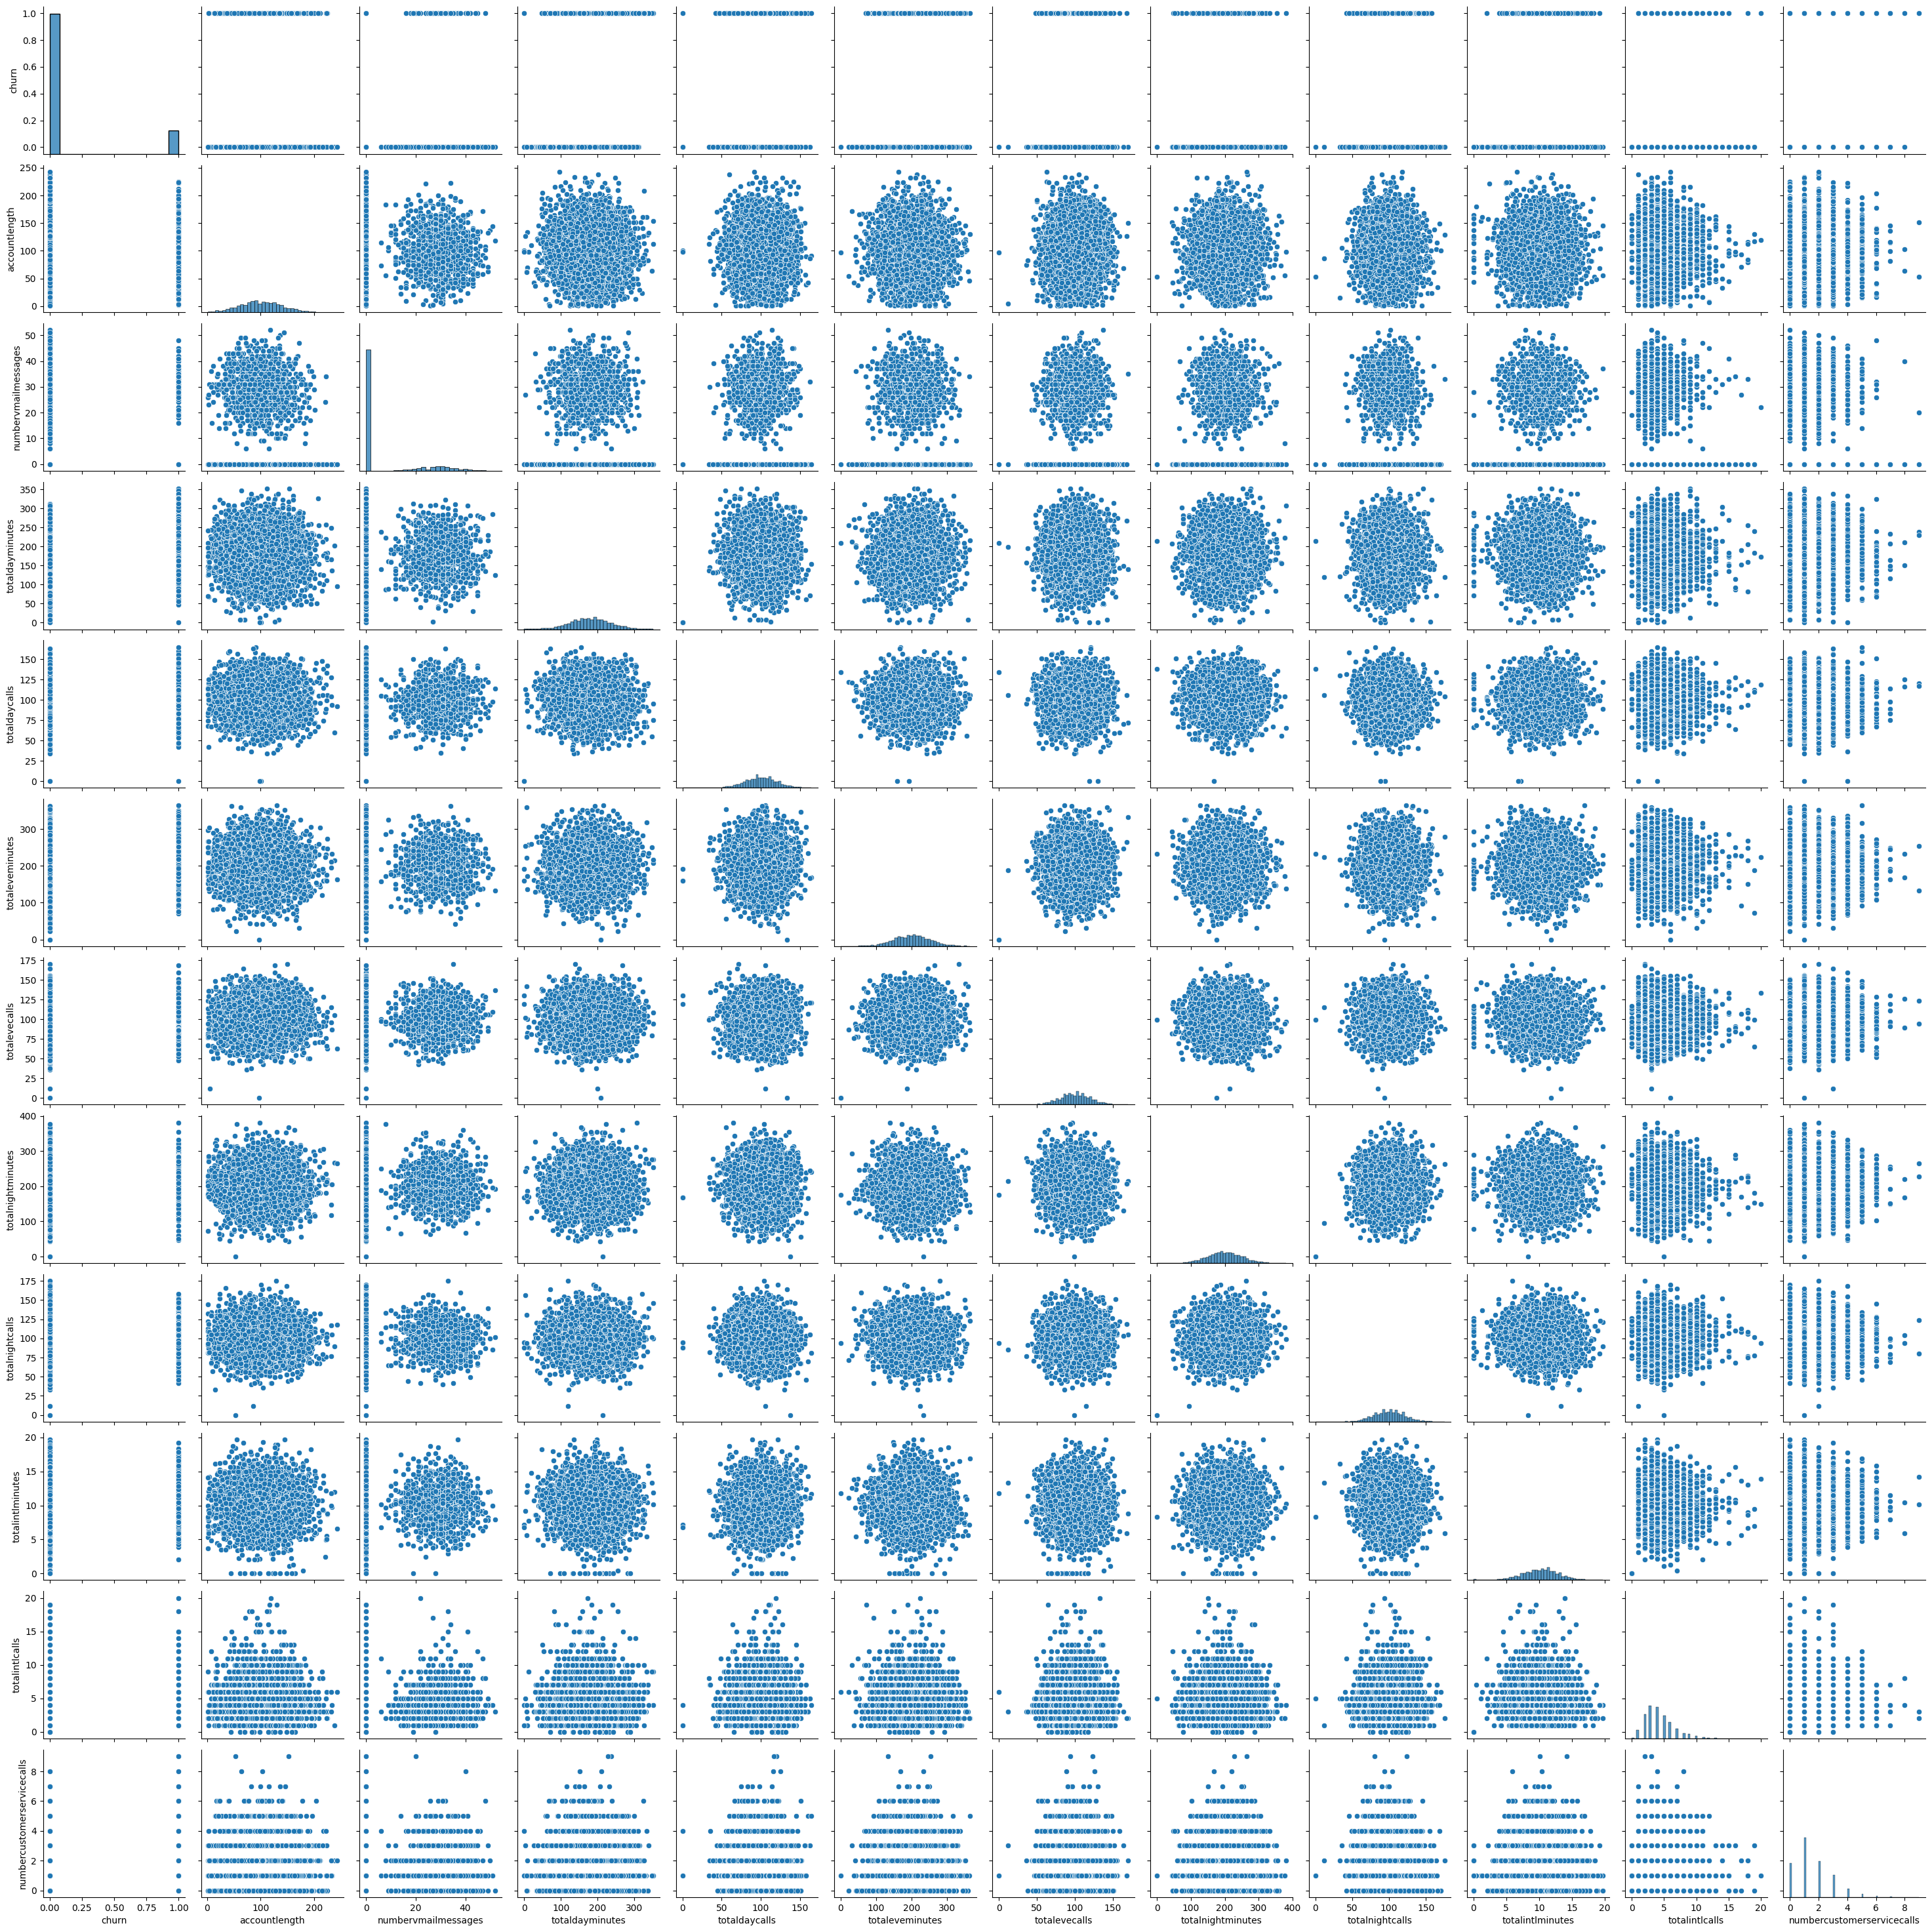

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df_train.loc[:,quants])

International plan

Text(0.5, 1.0, 'International Plan status')

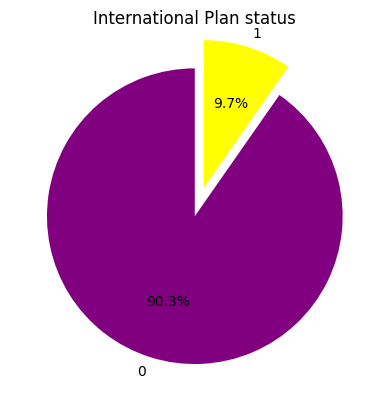

In [ ]:
# International plan
frequency = df_train['internationalplan'].value_counts()

fig, ax = plt.subplots()
ax.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=90, explode=(0,0.2), colors=["purple","yellow"])
plt.title('International Plan status')

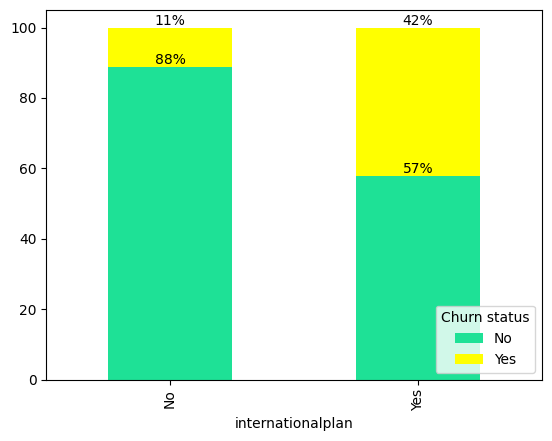

In [ ]:
# Associations between the categorical variables and the Response variable (churn)
# International plan vs churn status

percent = df_train.groupby(["internationalplan",'churn']).size().unstack(fill_value=0).div(df_train.groupby(["internationalplan",'churn']).size().unstack(fill_value=0).sum(axis=1), axis=0) * 100
ax = percent.plot(kind='bar', stacked=True,color=['#1EE196', 'yellow'])

ax.set_xticklabels(['No', 'Yes'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='Churn status',loc = "lower right")

# Add percentages as labels
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()


Account length

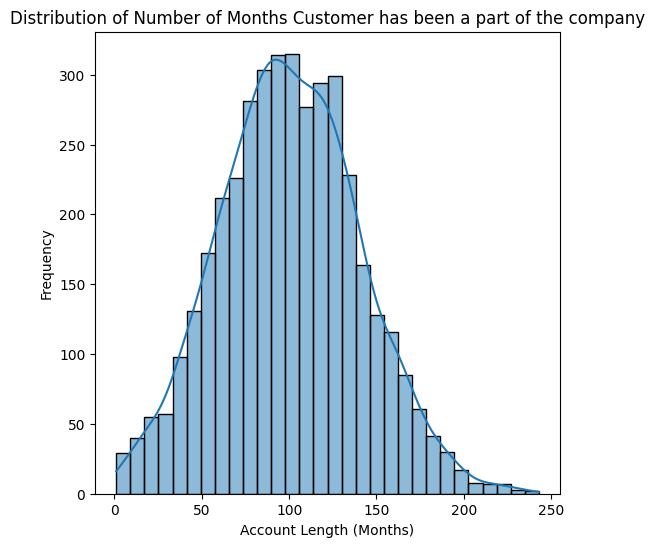

In [ ]:
# accountlength
# Number of Months Customer has been a part of the telecom company

# Histogram for the 'accountlength'
plt.figure(figsize=(6, 6))
sns.histplot(df_train['accountlength'], bins=30, kde=True)
plt.title('Distribution of Number of Months Customer has been a part of the company')
plt.xlabel('Account Length (Months)')
plt.ylabel('Frequency')
plt.show()


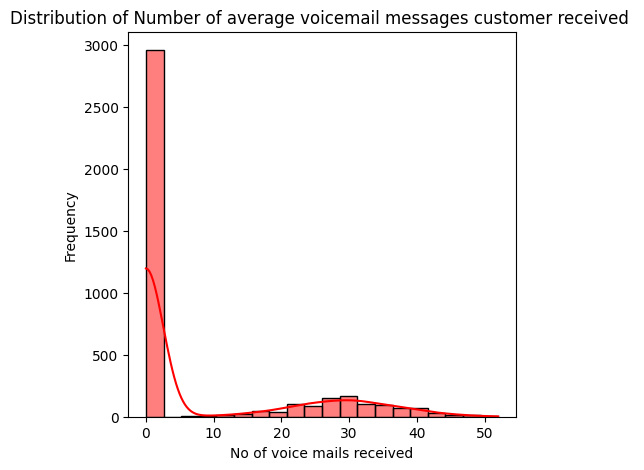

In [ ]:
# numbervmailmessages
# Number of Months Customer has been a part of the telecom company

# Histogram for the 'numbervmailmessages'
plt.figure(figsize=(5, 5))
sns.histplot(df_train['numbervmailmessages'], bins=20, kde=True,color='red')
plt.title('Distribution of Number of average voicemail messages customer received ')
plt.xlabel('No of voice mails received')
plt.ylabel('Frequency')
plt.show()

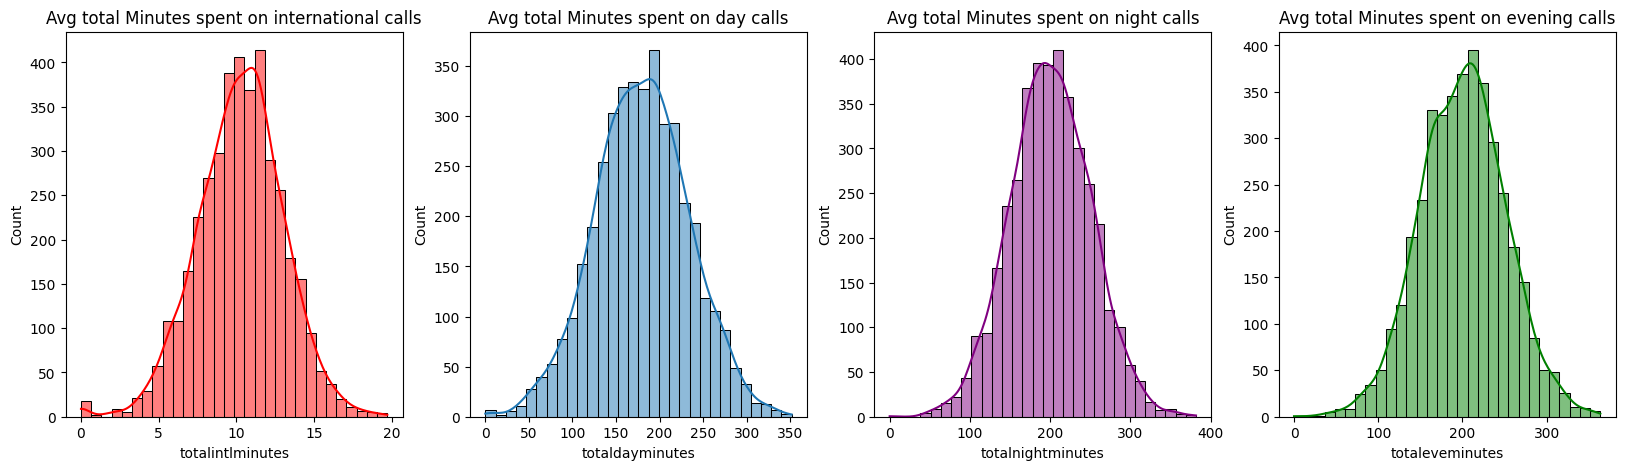

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.histplot(df_train['totalintlminutes'], bins=30, kde=True,color='red', ax=axes[0])
axes[0].set_title('Avg total Minutes spent on international calls')

sns.histplot(df_train['totaldayminutes'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Avg total Minutes spent on day calls')

sns.histplot(df_train['totalnightminutes'], bins=30, kde=True,color='purple', ax=axes[2])
axes[2].set_title('Avg total Minutes spent on night calls')

sns.histplot(df_train['totaleveminutes'], bins=30, kde=True,color='green', ax=axes[3])
axes[3].set_title('Avg total Minutes spent on evening calls')

plt.show()

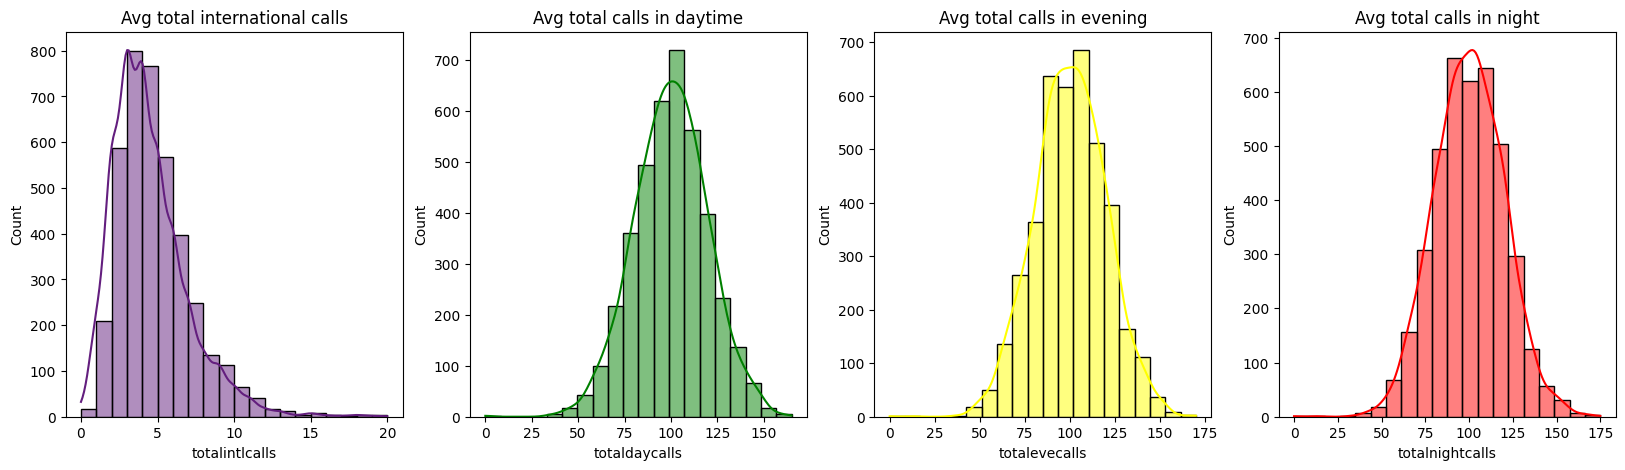

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.histplot(df_train['totalintlcalls'], bins=20, kde=True,color='#631e7e', ax=axes[0])
axes[0].set_title('Avg total international calls')

sns.histplot(df_train['totaldaycalls'], bins=20, kde=True,color='green', ax=axes[1])
axes[1].set_title('Avg total calls in daytime')

sns.histplot(df_train['totalevecalls'], bins=20, kde=True,color='yellow', ax=axes[2])
axes[2].set_title('Avg total calls in evening')

sns.histplot(df_train['totalnightcalls'], bins=20, kde=True,color='red', ax=axes[3])
axes[3].set_title('Avg total calls in night')

plt.show()

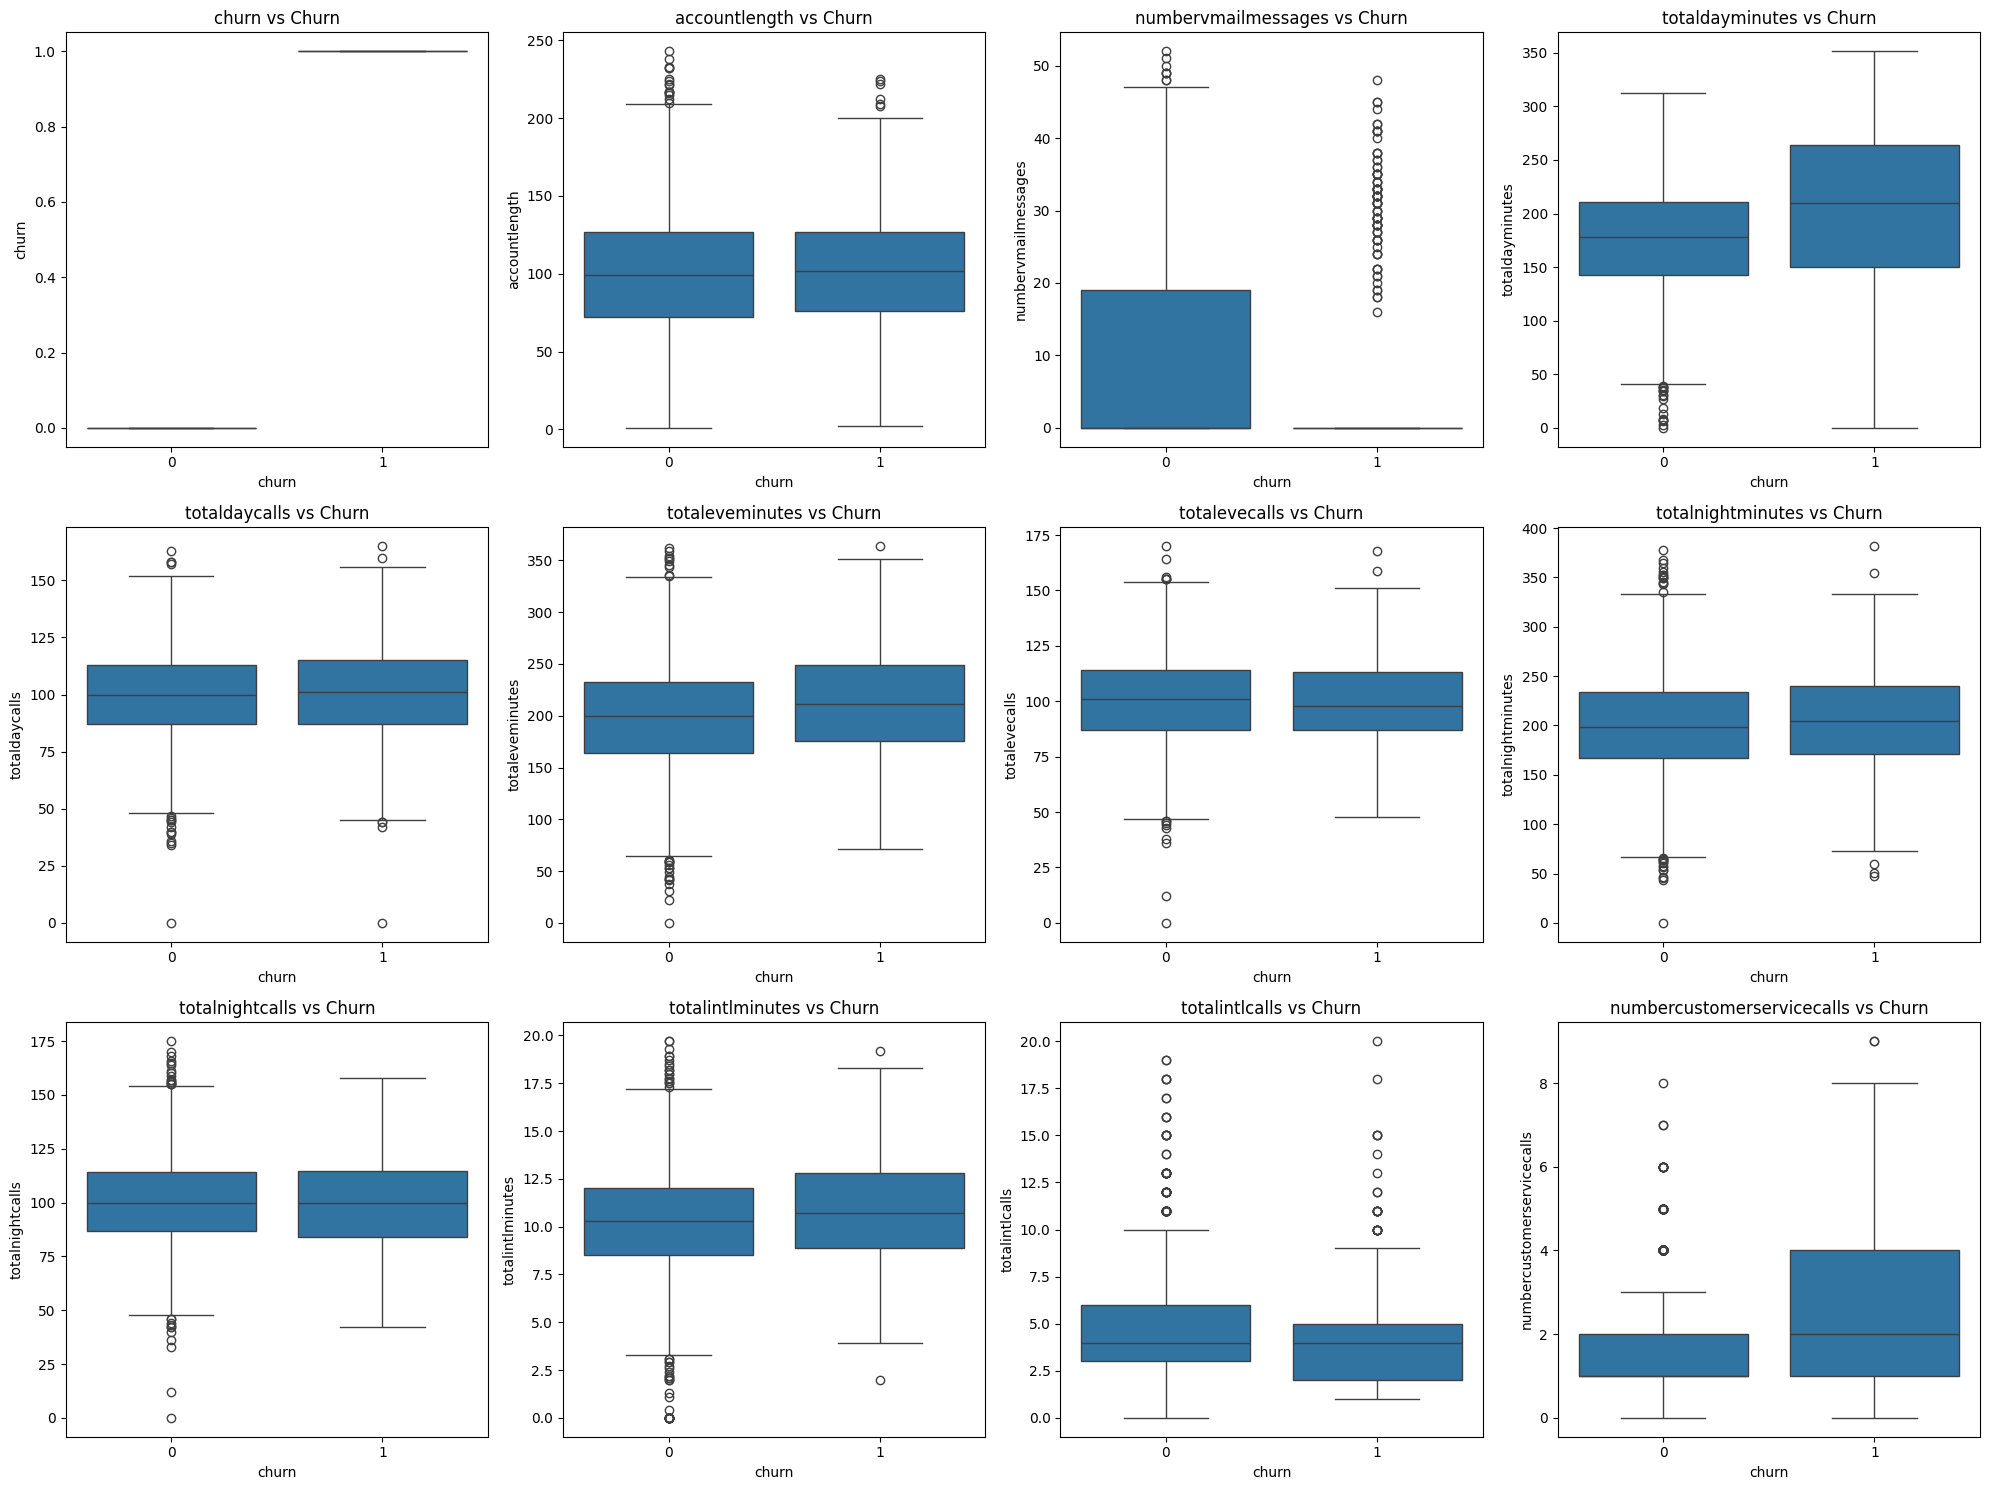

In [ ]:
# Create a figure and axes
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over quantitative variables and create boxplots
for i, quant in enumerate(quants):
    sns.boxplot(x='churn', y=quant, data=df_train, ax=axes[i])
    axes[i].set_title(f'{quant} vs Churn')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

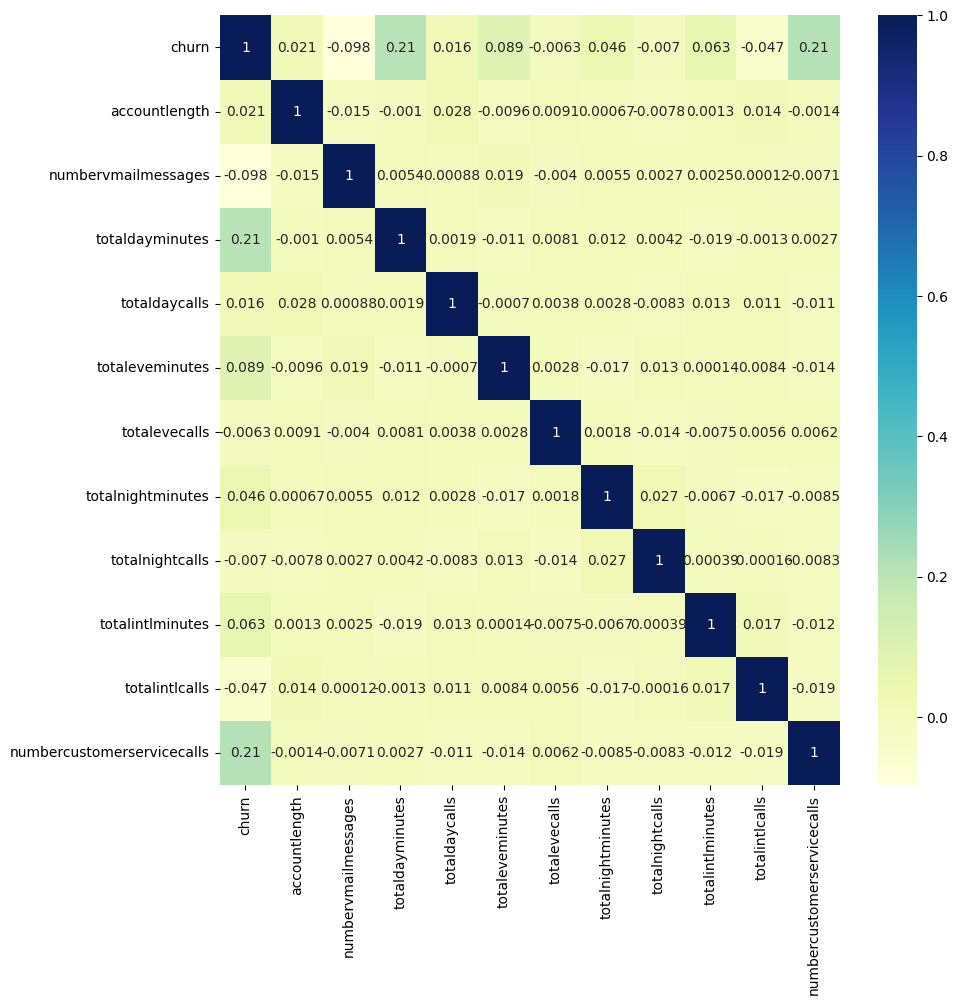

In [ ]:
# correlation heatmap to identify if there any correlated numerical features having
# correlation heatmap with new features
plt.figure(figsize=(10,10))
sns.heatmap(df_new.loc[:,quants].corr(),cmap='YlGnBu',annot=True)
plt.show()

**# Multicollinearity between all the predictors**

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
df_X_train = df_train.drop("churn",axis=1)
cats_pred =  ["internationalplan"]
df_X_train[cats_pred] = df_X_train[cats_pred].astype('int64')
df_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 4373 to 3711
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   accountlength               4000 non-null   float64
 1   internationalplan           4000 non-null   int64  
 2   numbervmailmessages         4000 non-null   float64
 3   totaldayminutes             4000 non-null   float64
 4   totaldaycalls               4000 non-null   float64
 5   totaleveminutes             4000 non-null   float64
 6   totalevecalls               4000 non-null   float64
 7   totalnightminutes           4000 non-null   float64
 8   totalnightcalls             4000 non-null   float64
 9   totalintlminutes            4000 non-null   float64
 10  totalintlcalls              4000 non-null   float64
 11  numbercustomerservicecalls  4000 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 406.2 KB


In [ ]:
# Calculate VIF for each feature
def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)
df_X_train = add_constant(df_X_train)
VIF=pd.Series([variance_inflation_factor(df_X_train.values, i) for i in range(df_X_train.shape[1])],index=df_X_train.columns)
print(VIF)
pd.DataFrame(VIF)

const                         146.313358
accountlength                   1.002791
internationalplan               1.004933
numbervmailmessages             1.003267
totaldayminutes                 1.001875
totaldaycalls                   1.001175
totaleveminutes                 1.003603
totalevecalls                   1.001052
totalnightminutes               1.002992
totalnightcalls                 1.002440
totalintlminutes                1.002981
totalintlcalls                  1.002071
numbercustomerservicecalls      1.001225
dtype: float64


0
const                       146.313358
accountlength                 1.002791
internationalplan             1.004933
numbervmailmessages           1.003267
totaldayminutes               1.001875
totaldaycalls                 1.001175
totaleveminutes               1.003603
totalevecalls                 1.001052
totalnightminutes             1.002992
totalnightcalls               1.002440
totalintlminutes              1.002981
totalintlcalls                1.002071
numbercustomerservicecalls    1.001225

# **Associations between response and the predictors**

**Response vs Categorical variables**

In [ ]:
from scipy.stats import chi2_contingency

# Perform the chisquare test and take the results
contingency_table = pd.crosstab(df_train['internationalplan'], df_train["churn"])
chi2, p, _, _ = chi2_contingency(contingency_table)
alpha = 0.05
if p < alpha:
    print('internationalplan',chi2,p, "\n", "reject H0 - Variables are correlated ")
else:
    print('internationalplan',chi2,p,"\n"," Do not reject H0 - Variables are not correlated")


internationalplan 277.0942022597743 3.227241128899028e-62 
 reject H0 - Variables are correlated 


**Response vs Quantitative variables**

In [ ]:
from scipy.stats import pointbiserialr
Associated_vars_quantitative = []
cor = []
# Calculate the point biserial correlation coefficient
for i in quants:
    # Perform point-biserial test
    corr, p = pointbiserialr(df_train[i], df_train["churn"])
    alpha = 0.05
    if p < alpha:
        print(i,corr, p,"\n", "reject H0 - Variables are correlated")
    else:
        print(i,corr, p,"\n", "Do not reject H0 - Variables are not correlated")

    if p <= 0.05:
       Associated_vars_quantitative.append(i)

    cor.append(corr)

churn 0.9999999999999976 0.0 
 reject H0 - Variables are correlated
accountlength 0.02150673590794766 0.1738496820849817 
 Do not reject H0 - Variables are not correlated
numbervmailmessages -0.0925483673948092 4.5176114485043984e-09 
 reject H0 - Variables are correlated
totaldayminutes 0.1904485143450826 5.5539673701050264e-34 
 reject H0 - Variables are correlated
totaldaycalls 0.006558847452684923 0.6783668431265633 
 Do not reject H0 - Variables are not correlated
totaleveminutes 0.09185747575275581 5.882338717718085e-09 
 reject H0 - Variables are correlated
totalevecalls -0.014812712380974527 0.3489660164236084 
 Do not reject H0 - Variables are not correlated
totalnightminutes 0.04103053144158525 0.009451376241199794 
 reject H0 - Variables are correlated
totalnightcalls -0.00975468354867623 0.5373915824006781 
 Do not reject H0 - Variables are not correlated
totalintlminutes 0.07121426874935816 6.5348312694592675e-06 
 reject H0 - Variables are correlated
totalintlcalls -0.043

In [ ]:
print("Quantitative predictors which are associated with the response:","\n","\n",Associated_vars_quantitative)

Quantitative predictors which are associated with the response: 
 
 ['churn', 'numbervmailmessages', 'totaldayminutes', 'totaleveminutes', 'totalnightminutes', 'totalintlminutes', 'totalintlcalls', 'numbercustomerservicecalls']
